Escolha de base de dados

Para as questões a seguir, usaremos uma base de dados e faremos a análise exploratória dos dados, antes da clusterização.

Baixe os dados disponibilizados na plataforma Kaggle sobre dados sócio-econômicos e de saúde que determinam o índice de desenvolvimento de um país. Esses dados estão disponibilizados através do link: https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data
Quantos países existem no dataset?
Mostre através de gráficos a faixa dinâmica das variáveis que serão usadas nas tarefas de clusterização. Analise os resultados mostrados. O que deve ser feito com os dados antes da etapa de clusterização?
Realize o pré-processamento adequado dos dados.

In [68]:
from scipy import stats
from sklearn.preprocessing import StandardScaler
import numpy as np
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
%matplotlib inline
import seaborn as sns; sns.set()  # for plot styling
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import pairwise_distances
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score

In [69]:
data = 'C:/Users/laiss/OneDrive/Arquivos/analista de dados/aprendizado não - supervisionado/arquivo p o projeto/Country-data.csv'

In [70]:
df = pd.read_csv(data)

In [71]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [72]:
df['country'].unique # tem 167 paises

<bound method Series.unique of 0              Afghanistan
1                  Albania
2                  Algeria
3                   Angola
4      Antigua and Barbuda
              ...         
162                Vanuatu
163              Venezuela
164                Vietnam
165                  Yemen
166                 Zambia
Name: country, Length: 167, dtype: object>

In [73]:
#df_profile = ProfileReport(df) # é possível verificar que o dataframe está limpo.
#df_profile

In [74]:
Variáveis = df.columns
Variáveis

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

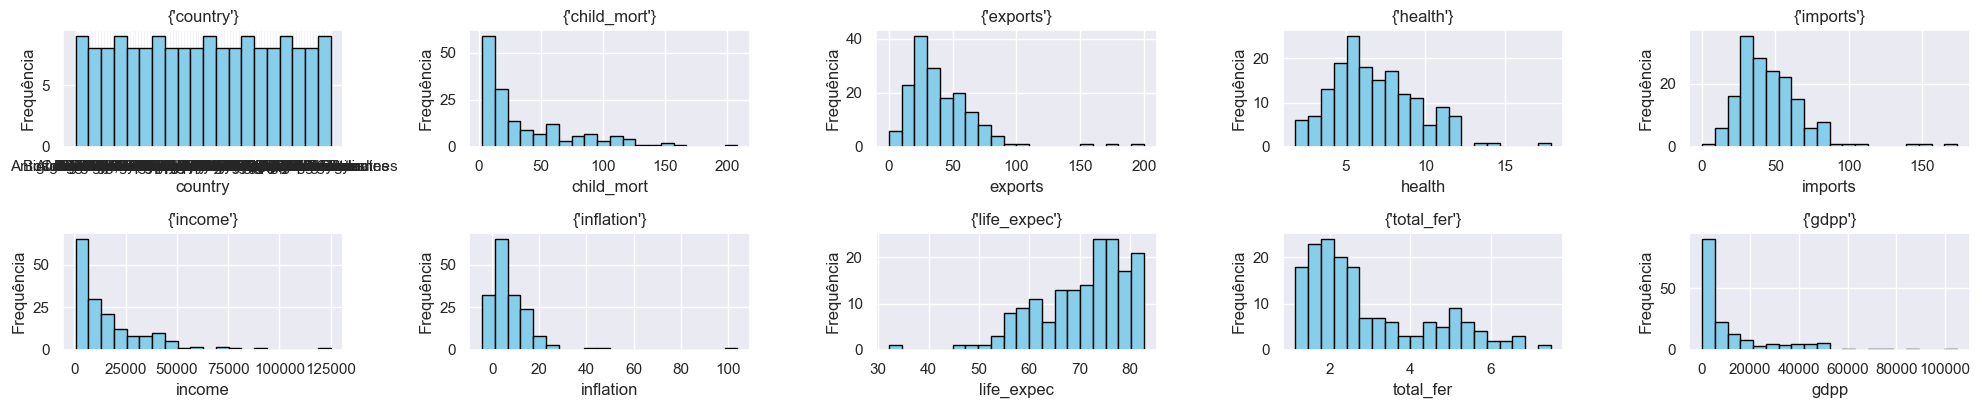

In [75]:
#com os histogramas por variável poderemos verificar os dados visualmente, e verificar a presença de outliers.
plt.figure(figsize=(20, 20))
for x, y in enumerate(Variáveis):
    plt.subplot(10, 5, x+1)
    plt.hist(df[y], bins=20, color='skyblue', edgecolor='black')
    plt.title({y})
    plt.xlabel(y)
    plt.ylabel('Frequência')

plt.tight_layout() # ajusta o layout dos subplots para não ter sobreposição
plt.show()

In [76]:
df_1 = df[df.columns[1:]] # devemos padronizar só as colunas numéricas.
df_1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [77]:
Scaler = StandardScaler().fit(df_1) # padronização dos dados pelo scaler
Scaler


StandardScaler()

In [78]:
X = Scaler.transform(df_1)# poderiamos usar a raiz quadrada para diminuir a interferÊncia de outliers se preciso fosse.


Para os dados pré-processados da etapa anterior você irá:

1 - Realizar o agrupamento dos países em 3 grupos distintos. Para tal, use:
K-Médias
Clusterização Hierárquica

2- Para os resultados, do K-Médias:
Interprete cada um dos clusters obtidos citando:

Qual a distribuição das dimensões em cada grupo;
O país, de acordo com o algoritmo, melhor representa o seu agrupamento. Justifique.


KMeans

In [79]:
kmeans_ = KMeans(n_clusters= 3).fit(X) # o problema já diz quantos clusters
kmeans_


KMeans(n_clusters=3)

In [80]:
labels = kmeans_.labels_ # para verificar os grupos
labels

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 1,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 2, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 1, 1, 0, 2, 1, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2])

In [81]:
uniq, counts = np.unique(labels, return_counts= True) # dimensão de cada grupo

In [82]:
uniq

array([0, 1, 2])

In [83]:
counts

array([85, 36, 46], dtype=int64)

In [84]:
#calculando silhueta

y_kmeans = kmeans_.predict(X)

In [85]:
silhueta_kmeans =  silhouette_score(X, y_kmeans)
silhueta_kmeans

0.28437730261801497

In [86]:
df_1['cluster'] = labels 
df_1

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,2


In [87]:
group_0 = df_1.groupby('cluster').get_group(0)
group_0

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
5,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300,0
6,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220,0
...,...,...,...,...,...,...,...,...,...,...
160,10.6,26.3,8.35,25.4,17100,4.91,76.4,2.08,11900,0
161,36.3,31.7,5.81,28.5,4240,16.50,68.8,2.34,1380,0
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0


In [88]:
group_1 = df_1.groupby('cluster').get_group(1)
group_1

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
7,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,1
8,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,1
11,8.6,69.5,4.97,50.9,41100,7.440,76.0,2.16,20700,1
15,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,1
23,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,1
29,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400,1
42,3.6,50.2,5.97,57.5,33900,2.010,79.9,1.42,30800,1
43,3.4,66.0,7.88,62.9,28300,-1.430,77.5,1.51,19800,1
44,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000,1
53,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200,1


In [89]:
group_2 = df_1.groupby('cluster').get_group(2)
group_2

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,2
3,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,2
17,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,2
25,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,2
26,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,2
28,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,2
31,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,2
32,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897,2
36,88.2,16.50,4.51,51.7,1410,3.870,65.9,4.75,769,2
37,116.0,41.10,7.91,49.6,609,20.800,57.5,6.54,334,2


In [90]:
mean_group_0 = group_0.mean()
mean_group_0

child_mort       22.287059
exports          40.283400
health            6.225647
imports          47.518422
income        12317.294118
inflation         7.616424
life_expec       72.629412
total_fer         2.314235
gdpp           6484.847059
cluster           0.000000
dtype: float64

In [91]:
mean_group_1 = group_1.mean()
mean_group_1

child_mort        5.000000
exports          58.738889
health            8.807778
imports          51.491667
income        45672.222222
inflation         2.671250
life_expec       80.127778
total_fer         1.752778
gdpp          42494.444444
cluster           1.000000
dtype: float64

In [92]:
mean_group_2 = group_2.mean()
mean_group_2

child_mort      93.841304
exports         28.837174
health           6.346957
imports         42.128261
income        3738.978261
inflation       12.087065
life_expec      59.232609
total_fer        5.054348
gdpp          1826.130435
cluster          2.000000
dtype: float64

In [93]:
dist_cent = kmeans_.fit_transform(X)**2

dist_cent

array([[ 32.32583067,   2.23926538,  20.69581242],
       [ 35.55139405,   8.59356967,   2.23919859],
       [ 21.91308229,   6.74120859,   4.92685423],
       [ 22.75650988,   6.88865391,  26.0012458 ],
       [ 39.71431679,  10.005383  ,   0.87967823],
       [ 20.84703053,  10.68975636,   6.00255236],
       [ 31.31536372,   7.57443982,   4.39777975],
       [ 51.32366147,  24.79875646,   6.90958518],
       [ 54.39706819,  26.13284816,   5.17407551],
       [ 24.31188817,   6.58045012,   4.50394561],
       [ 42.54746489,  11.37008712,   0.91344832],
       [ 36.97758243,  14.73179257,   2.01545973],
       [ 30.17704059,   5.33571221,   8.83084694],
       [ 41.2765053 ,  10.50134435,   0.76819053],
       [ 27.08498586,   9.91344793,   3.18679104],
       [ 55.82174297,  27.13341283,   6.21449104],
       [ 38.10420214,   6.62189294,   3.29204393],
       [ 38.81212322,   2.45728688,  19.37337126],
       [ 33.38066787,   5.52150307,   4.42194979],
       [ 27.11346354,   2.94723

In [94]:
dist_cent_1 = dist_cent.sum(axis= 1)

dist_cent_1

array([ 55.26090846,  46.38416231,  33.5811451 ,  55.64640959,
        50.59937801,  37.53933926,  43.28758329,  83.03200312,
        85.70399186,  35.3962839 ,  54.83100033,  53.72483473,
        44.34359974,  52.54604018,  40.18522483,  89.16964685,
        48.01813901,  60.64278137,  43.32412073,  35.42650482,
        63.14294952,  40.70030649,  49.71840163,  87.49974184,
        51.09580369,  60.14794948,  66.63038097,  44.15689674,
        60.07444719,  82.96285021,  49.35662902,  88.43441262,
        76.7647754 ,  44.93739604,  45.31585084,  50.10022489,
        49.25757602,  56.11121808,  48.86702199,  54.98919229,
        56.87572445,  53.46673856,  63.43100813,  65.96855905,
        90.22018681,  40.21112125,  40.87621051,  36.32384201,
        45.37239137,  55.29861232,  47.4725962 ,  60.4546443 ,
        45.44919246,  75.1639337 ,  81.38727373,  36.99408898,
        49.97640532,  45.96882508,  82.93385054,  33.61309611,
        68.6485768 ,  47.67632835,  38.89659004,  46.78

In [95]:
df['cluster'] = labels
df['dist'] = dist_cent_1 
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,dist
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2,55.260908
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,46.384162
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,33.581145
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2,55.646410
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,50.599378
...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0,44.224625
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0,44.770449
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0,48.729346
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,2,29.912632


In [96]:
Países = df.loc[df.groupby('cluster')['dist'].idxmin()]
Países

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,dist
79,Kazakhstan,21.5,44.2,4.29,29.9,20100,19.50,68.4,2.60,9070,0,30.983839
11,Bahrain,8.6,69.5,4.97,50.9,41100,7.44,76.0,2.16,20700,1,53.724835
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,2,29.912632


são divididos em 3 grupos, como se fossem países desenvolvidos, em desenvolvimento e subdesenvolvidos. A menor distancia do centroide de cada grupo representa o país que melhor representa o grupo . Países = desenvolvidos = gropo 0 = Israel/ Países = em desenvolvimento = gropo 2 = suriname/Países = subdesenvolvidos= gropo 1 = Iraque.

Pronto, agora é analisar os dados e responder

3- Para os resultados da Clusterização Hierárquica, apresente o dendograma e interprete os resultados.

4 -Compare os dois resultados, aponte as semelhanças e diferenças e interprete.

Clusterização hieráquica

In [97]:
cluster_hier = AgglomerativeClustering(n_clusters=3).fit(X)
cluster_hier

AgglomerativeClustering(n_clusters=3)

In [98]:
y_ch = cluster_hier.fit_predict(X)
y_ch

array([2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1,
       1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 2, 1, 0, 1, 0, 1, 1, 2, 2, 1,
       2, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 2, 2, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       0, 0, 2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 0, 2, 1, 1,
       2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 2, 1, 1, 2, 1, 1, 1,
       1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2], dtype=int64)

In [99]:
silhueta_hier = silhouette_score(X, y_ch)
silhueta_hier

0.24563001303300652

In [100]:

# faz a silhueta para verificar a comparação. e a comparação do kmeans e clusterização hierarquica ver se os grupos sao iguais?
#plotando a cluterização



In [101]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

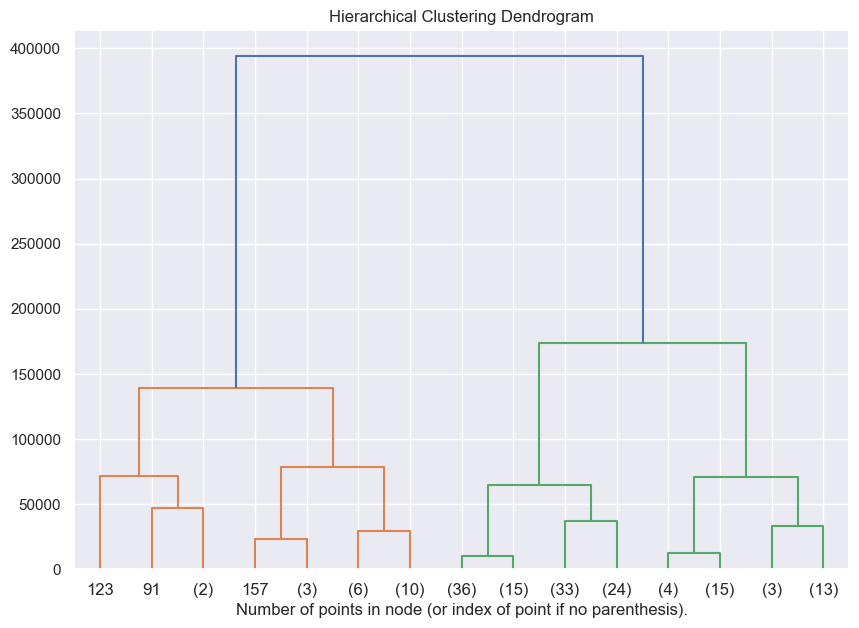

In [102]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(df_1)
plt.figure(figsize=(10, 7))
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [106]:
silhueta_hier


0.24563001303300652

In [105]:
silhueta_kmeans

0.28437730261801497

Um ótimo método para avaliar a qualidade da clusterização  é o da silhoute_score, como vimos nos resultados, o método Kmeans, por estar mais perto de 1, é o mais indicado para a separação dos grupos.

Comparado os dois métodos, percebemos que são duas abordagens diferentes. O kmeans divide em quantidade específica de clusters, e tem por objetivo diminuir as distancias para o centro do cluster. Já a clusterização hieráquica os clusters são criados formando uma árvore de clusters, que se torna mais flexivel para a formação dos grupos do que o kmeans.
Suas semelhanças são que podem ser aplicados a vários domínios, os dois tem o objetivos de separar em grupos similiares e os dois são técnicas de aprendizado de máquina não supervisionado. 


Escolha de algoritmos

1-Escreva em tópicos as etapas do algoritmo de K-médias até sua convergência.

2 -O algoritmo de K-médias converge até encontrar os centróides que melhor descrevem os clusters encontrados (até o deslocamento entre as interações dos centróides ser mínimo). Lembrando que o centróide é o baricentro do cluster em questão e não representa, em via de regra, um dado existente na base. Refaça o algoritmo apresentado na questão 1 a fim de garantir que o cluster seja representado pelo dado mais próximo ao seu baricentro em todas as iterações do algoritmo.
Obs: nesse novo algoritmo, o dado escolhido será chamado medóide.

3- O algoritmo de K-médias é sensível a outliers nos dados. Explique.

4 - Por que o algoritmo de DBScan é mais robusto à presença de outliers?

1- Resposta:
    - verificando os clusters com a ajuda do método do cotovelo fazer a escolha do número de clusters
    - execução do k-means com o numero de cluster escolhido 
    - Inicialize os centróides
    - Atribua pontos aos clusters
    - Atualize os centróides
    - Verifique a convergência, fazer esses processos até chegar na convergência


3- Resposta: Os centroides são calculados por média de todos os pontos atribuidos, então se tem um ponto muito distante, pode distorcer a média, e criando centroides que não representa a maioria dos pontos. O método também usa a distância euclidiada para verificar a similaridade dos pontos, então outliers pode influenciar a formação dos clusters.

4- Respostas: O algoritmo DBSCAN é mais sensível à presença de outliers por causa de sua abordagem baseada em densidade para a formação de clusters. O DBSCAN agrupa pontos com base na quantidade local dos pontos. Ele identifica regiões de alta densidade como clusters e pontos isolados como ruído (outliers). Como os outliers geralmente não têm uma densidade em comparação com os pontos em clusters, o DBSCAN tende a informar como ruído. Ele também não pede a especificação do número de clusters a priori. Ele identifica naturalmente os clusters com base na densidade dos pontos.Isso significa que os outliers não interferem na determinação do número de clusters, pois são tratados como ruído e não como clusters separados.
